# Introduction to Machine Learning: Getting Started with Linear Regression
Author: Sophia Kuhn (sophia.kuhn@ibk.baug.ethz.ch)

Welcome to the first notebook of the AI in AEC (Architecture, Engineering, and Construction) Summer School! In this exercise, we will take our first steps into the world of machine learning by working with a simple yet powerful algorithm: **Linear Regression**.

Linear Regression is a foundational algorithm used to model relationships between variables. It serves as a great starting point for understanding the basic concepts and workflow of machine learning. This notebook will guide you through the essential steps of a typical machine learning workflow, which includes:

1. **Importing Data**: Loading the data into the notebook.
2. **Data Exploration**: Getting an understanding of the data.
3. **Data Preprocessing**: Cleaning and preparing the data for training.
4. **Model Training**: Building and training a Linear Regression model on the data.
5. **Model Evaluation**: Assessing the performance of the trained model.

While this example uses Linear Regression for simplicity, the workflow demonstrated here is applicable to more complex machine learning tasks.


### Package Import

Import the following libraries. To install these packages you can run `pip install numpy pandas matplotlib seaborn`.

In [67]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.  Importing Data

In this notebook, we are working with a dataset of **Network Tied-Arch Bridges** [1]. The dataset includes information on over 64 different bridges, each represented as a row in the dataset. Each bridge is described by nearly 14 different properties, with each column representing a specific property. These properties might include characteristics such as dimensions, material type, and other structural or design-related attributes. A description of the properties is provided in the image below.

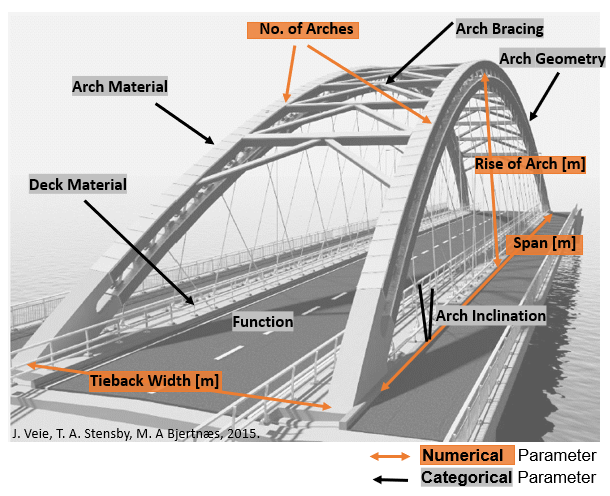

In [45]:
from IPython.display import Image
Image("BridgePropertiesDefinition.png")

In [46]:
# import the dataset as a pandas DataFrame
df = pd.read_csv("Network_TiedArchBridges_Preprocessed.csv", delimiter=';')

# show head of dataFrame
df.head()


,Name,Year,Country,Function,Material Arch,Material Deck,Coordinates N / S,Coordinates E / W,Span [m],Rise of Arch [m],Rise-Span Ratio,Width Tie Backs [m],Horizontal Arch Inclination,Arch Bracing
0,Agoishi Bridge,1985,Japan,Road Bridge,Steel,Steel-Concrete Composite,"34Â° 13' 11.52"" N","135Â° 8' 44.43"" E",163.4,26.0,6.284615,10.25,Yes,Cross Girder
1,Akio Bridge,1968,Japan,Road Bridge,Steel,Steel-Concrete Composite,"34Â° 26' 23.04"" N","132Â° 29' 0.59"" E",110.0,17.0,6.470588,6.00,Yes,Cross Girder
2,Amelia Earhart Bridge,2012,USA,Road Bridge,Steel,Steel-Concrete Composite,"39Â°33'34.0""N","95Â°06'48.4""W",160.6,26.5,6.060377,23.80,No,Diamond Truss
3,Ã…snes Bridge,2011,Norway,Road Bridge,Steel,Steel-Concrete Composite,"64Â°18'34.7""N","11Â°13'06.3""E",111.0,18.0,6.166667,9.00,No,K-Truss
4,Bent Bridge 1,2011,USA,Pedestrian Bridge,Steel,Reinforced Concrete,"37Â°19'33.7""N","121Â°51'38.9""W",82.3,6.7,12.283582,4.20,Yes,Diamond Truss


## 2. Data Exploration

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         64 non-null     object 
 1   Year                         64 non-null     int64  
 2   Country                      64 non-null     object 
 3   Function                     64 non-null     object 
 4   Material Arch                64 non-null     object 
 5   Material Deck                64 non-null     object 
 6   Coordinates N / S            64 non-null     object 
 7   Coordinates E / W            64 non-null     object 
 8   Span [m]                     64 non-null     float64
 9   Rise of Arch [m]             64 non-null     float64
 10  Rise-Span Ratio              64 non-null     float64
 11  Width Tie Backs [m]          64 non-null     float64
 12  Horizontal Arch Inclination  64 non-null     object 
 13  Arch Bracing          

In [48]:
df.describe()

,Year,Span [m],Rise of Arch [m],Rise-Span Ratio,Width Tie Backs [m]
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,2006.734375,120.605469,19.642031,6.441425,14.987031
std,13.429702,66.711213,12.120414,1.464377,7.573383
min,1963.000000,35.000000,6.530000,4.357977,3.300000
25%,2006.750000,73.500000,11.325000,5.714286,8.940000
50%,2011.000000,108.000000,17.500000,6.163690,13.450000
75%,2014.000000,161.300000,25.250000,6.666667,20.700000
max,2020.000000,380.000000,72.700000,12.283582,36.900000


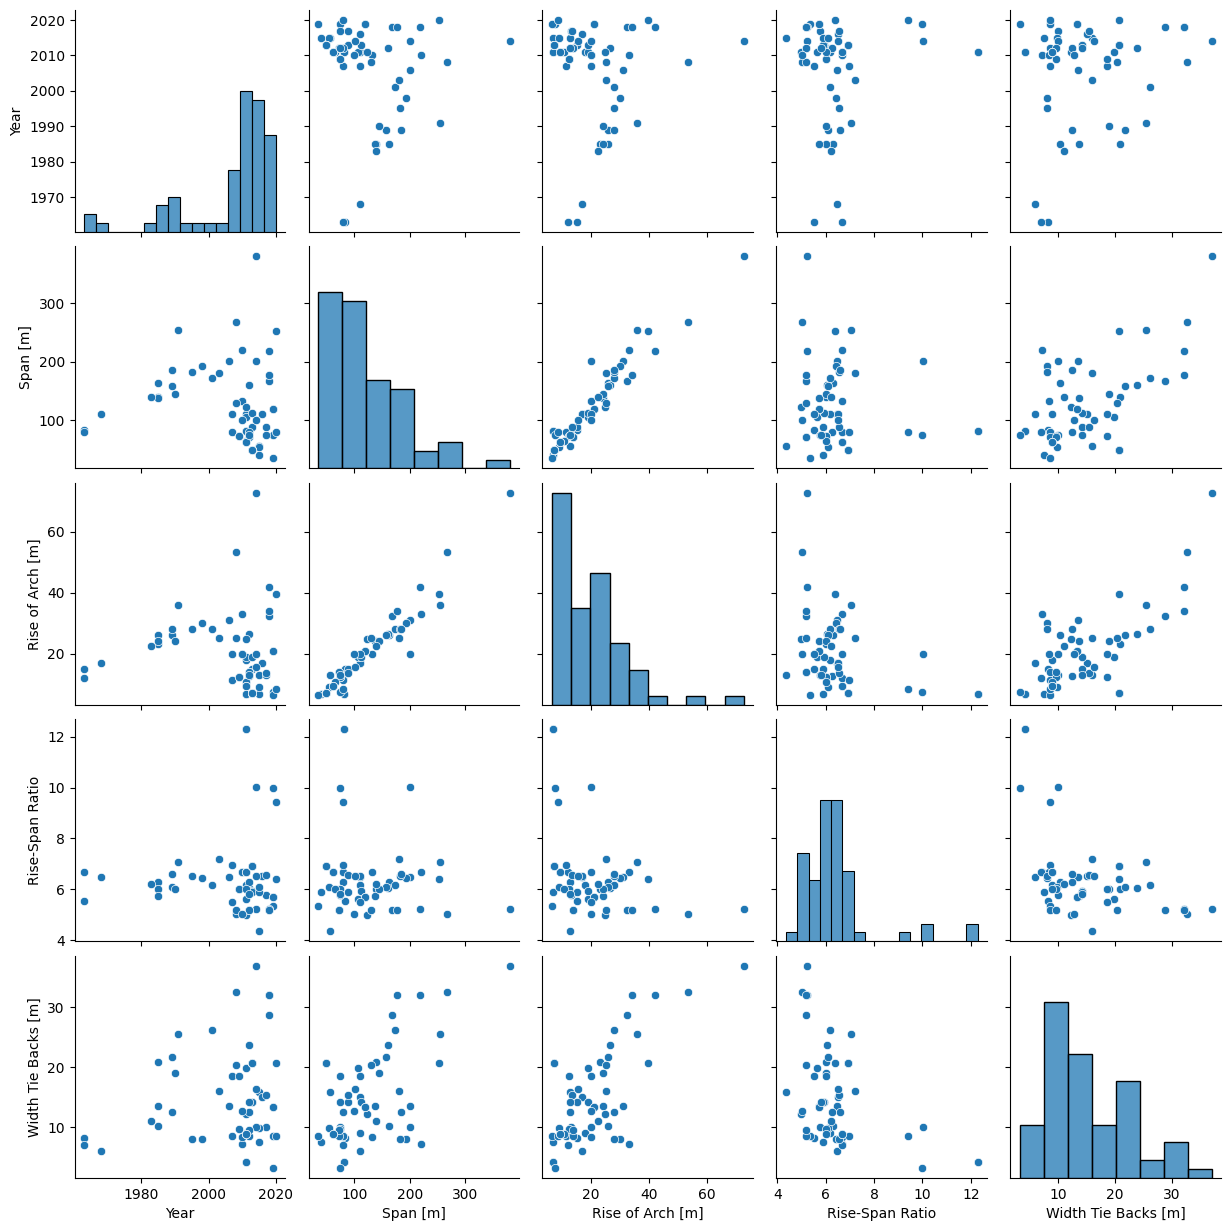

In [49]:
sns.pairplot(df)

## 3. Data Preprocessing

This dataset has already been preprocessed in advance and is complete, meaning it contains no missing values. While this allows us to focus directly on building and evaluating our model, it is important to note that in real-world scenarios, datasets often contain missing or incomplete information. In such cases, the first and a very crucial step is to preprocess the raw data. Preprocessing can include handling missing and outlier values, ensuring the quality of the data, normalizing or scaling the data, and much more.

With the cleaned data, we can now directly prepare the dataset for training by splitting it into a training set and a test set.


In [69]:
# Splitting the data in training and test set

#import splitting function
from sklearn.model_selection import train_test_split

#get relevant columns
X = df[['Span [m]']]
y = df[['Rise of Arch [m]']]

# split data (70% training set; 30% test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=101)

#print
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((44, 1), (20, 1), (44, 1), (20, 1))

## 4. Model Training

Our main objective will be to learn the relationship between the span of a bridge and the rise of its arch. Understanding this relationship is crucial in the design process of such bridge structures, as it allows engineers to make an initial estimate of the arch rise when designing a new bridge. Therefore, it may be useful to predict the `Rise of Arch` feature from the other properties.

In the pairplot above, we have seen that the `Rise of Arch` exhibits a linear relationship with the `Span` of the bridge. One possible approach is to build a linear regression model predicting the continuous variable `Rise of Arch [m]` of the bridge from the `Span [m]`. We start by using the `Span [m]` as the single independent feature and the `Rise of Arch [m]` as our dependent variable.

This means we are fitting the following function:

$y = mx + b $

Here, $m$ and $b$ are the parameters our algorithm will try to learn to produce the most accurate predictions.


In [70]:
# import function
from sklearn.linear_model import LinearRegression


#train model
model1 = LinearRegression().fit(X_train, y_train)


# print fitted coefficients and intercept
intercept = model1.intercept_
coefficients = model1.coef_
print('Intercep (b):', intercept)
print('Coefficient (m):', coefficients)



Intercep (b): [-2.11927049]
Coefficient (m): [[0.18151527]]


## 5. Evaluate Model

To evaluate our model we will use the following two metrics:

1. Mean Squared Error:
    
$$L=\frac{1}{N} \sum_{i=1}^{N}\left(y_{i}-\hat{y}_{i}\right)^{2}$$
    
    
2. R_squared

$$R^{2}=1-\frac{\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum_{i=1}^{n}\left(y_{i}-\bar{y}\right)^{2}}$$



In [71]:
#import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# calculate R_squared and Mean_squared_error for training set

# use trianed model to make predictions
y_pred_train = model1.predict(X_train)

# calculate metrics
R_squared = r2_score(y_train, y_pred_train)
MSE_train = mean_squared_error(y_train, y_pred_train)

#print
print('R_squared:', R_squared)
print('MSE:',MSE_train)

R_squared: 0.9229861621495611
MSE: 12.829256218250794


In [72]:
# compute R_squared and Mean_squared_error for the test data

## use trianed model to make predictions
y_pred = model1.predict(X_test)

# calculate metrics
OSR_squared=r2_score(y_test, y_pred)
MSE_test = mean_squared_error(y_test, y_pred)

#print
print('OSR2:', OSR_squared)
print('MSE:', MSE_test)

OSR2: 0.9009918899273964
MSE: 9.5210589407977


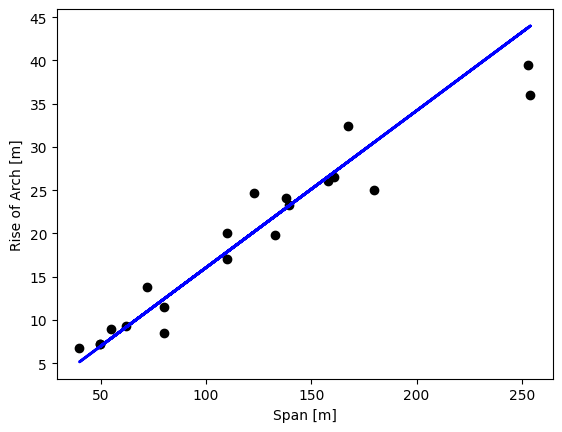

In [73]:
# plot model against test data

#plot test data
plt.scatter(X_test, y_test,  color='black')

#plot predicted data (linear model)
plt.plot(np.array(X_test),y_pred, color='blue', linewidth=2)

plt.xlabel('Span [m]')
plt.ylabel('Rise of Arch [m]')
plt.show()

# References

- [1] Kuhn, Sophia: Parametric Modelling and Generative Design - A Multi-Step Machine Learning Approach for Design and Optimization of Network Tied-Arch Bridges. Master's Thesis. IBK, ETH Zurich, 2021.

 
    